In [176]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

breast_cancer_data = load_breast_cancer()

In [177]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [178]:
breast_features = breast_cancer_data.feature_names

In [179]:
breast_features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [180]:
df_data = pd.DataFrame(breast_cancer_data.data, columns = breast_features)
df_labels = pd.DataFrame(breast_cancer_data.target, columns = ['label'])

In [181]:
data=pd.concat([df_data,df_labels],axis=1)

In [182]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [183]:
df_corr = data.corr()

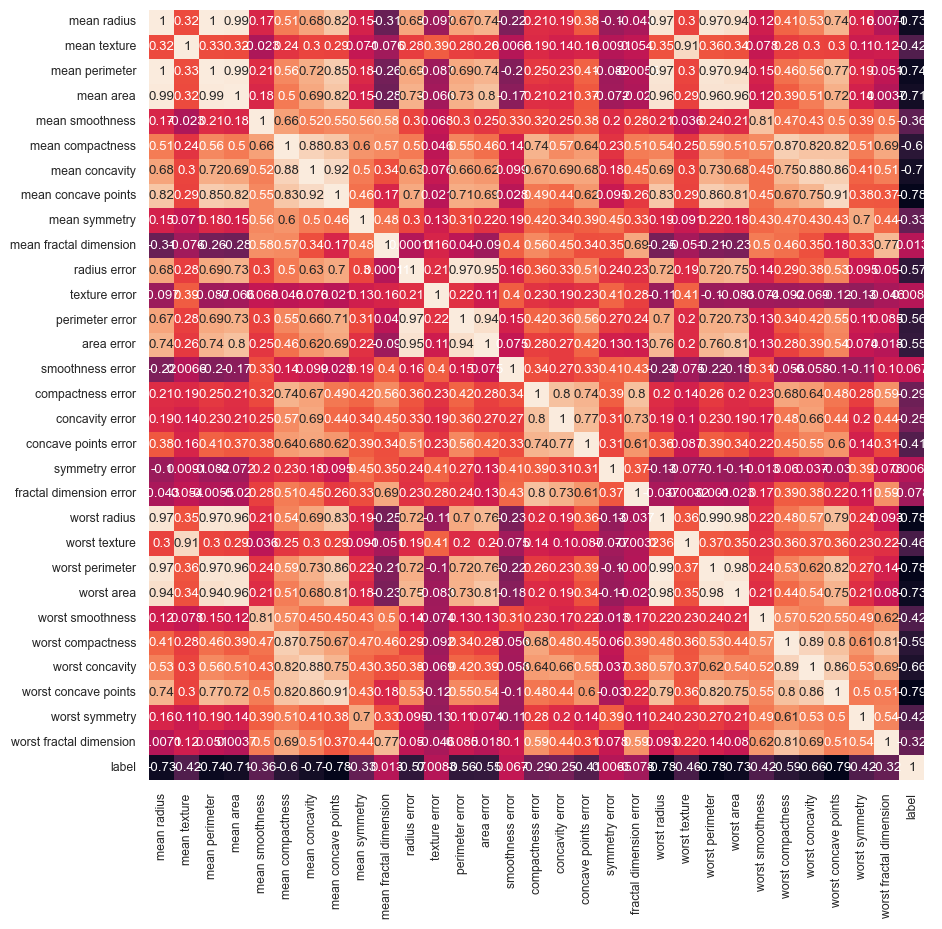

In [184]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [185]:
X = data.iloc[:,0:30].values
y = data.iloc[:,30].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [186]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [187]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [227]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(30,),activation='ReLU'))
model.add(Dense(8,activation='ReLU'))
model.add(Dense(7,activation='ReLU'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_193 (Dense)           (None, 10)                310       
                                                                 
 dense_194 (Dense)           (None, 8)                 88        
                                                                 
 dense_195 (Dense)           (None, 7)                 63        
                                                                 
 dense_196 (Dense)           (None, 2)                 16        
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [228]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
15/15 [==============================] - 1s 34ms/step - loss: 9.2838 - accuracy: 0.5780 - val_loss: 1.1916 - val_accuracy: 0.6930
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5803 - accuracy: 0.8242 - val_loss: 0.3792 - val_accuracy: 0.8509
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3828 - accuracy: 0.8527 - val_loss: 0.6801 - val_accuracy: 0.8070
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8104 - accuracy: 0.7670 - val_loss: 1.4161 - val_accuracy: 0.6930
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6416 - accuracy: 0.8132 - val_loss: 0.2347 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3376 - accuracy: 0.8923 - val_loss: 0.2429 - val_accuracy: 0.9298
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2328 - accuracy: 0.9077 - val_loss: 0.2522 - val_accuracy: 0.8947
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1595 - accuracy: 0.9407 - val_loss: 0.4140 - val_accuracy: 0.8596
Epoch 60/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2439 - accuracy: 0.8945 - val_loss: 0.2655 - val_accuracy: 0.8947
Epoch 61/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1638 - accuracy: 0.9341 - val_loss: 0.1495 - val_accuracy: 0.9474
Epoch 62/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2130 - accuracy: 0.9143 - val_loss: 0.4787 - val_accuracy: 0.8158
Epoch 63/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2613 - accuracy: 0.9011 - val_loss: 0.1571 - val_accuracy: 0.9474
Epoch 64/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1767 - accuracy: 0.9253 - val_loss: 0.1653 - val_accuracy: 0.9298
Epoch 65/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1766 - accuracy: 0.9341 - val_loss: 0.1624 - val_accuracy: 0.9474
Epoch 

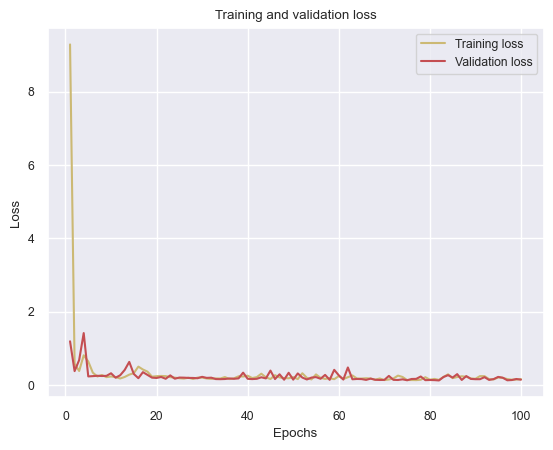

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

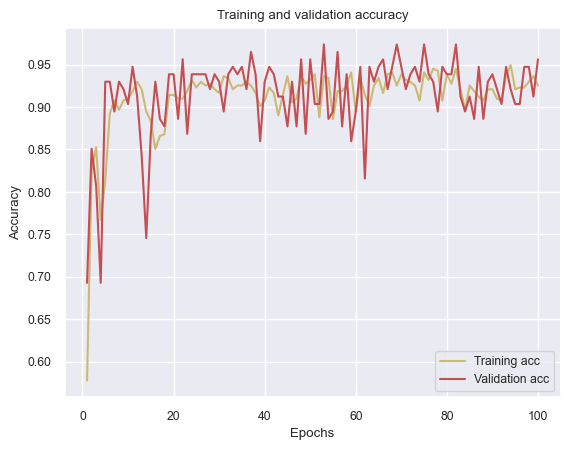

In [230]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [231]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[42  5]
 [ 0 67]]
